In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


In [137]:
df1=pd.read_excel("DataSet4_VirtualCareUtilization.xlsx",sheet_name="ARIMA Dataset")


In [138]:
df=pd.pivot_table(df1, values='Visits', index=['Date'],
                    aggfunc=np.sum).reset_index()
                    


In [139]:
df.tail()

,Date,Visits
21,2021-11-01,118652
22,2021-12-01,172345
23,2022-01-01,146797
24,2022-02-01,192261
25,2022-03-01,147582


<AxesSubplot: >

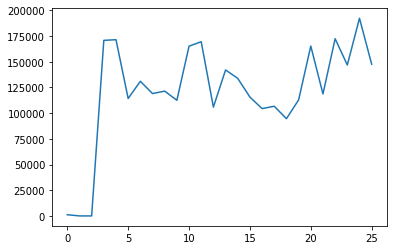

In [140]:
df.Visits.plot()


<AxesSubplot: >

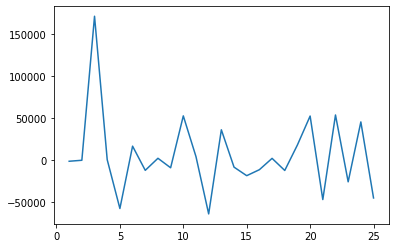

In [141]:
df.Visits.diff().plot()


<AxesSubplot: >

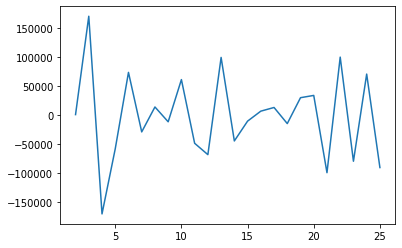

In [200]:
df.Visits.diff().diff().plot()


/Users/ZainHaider/Library/Python/3.10/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


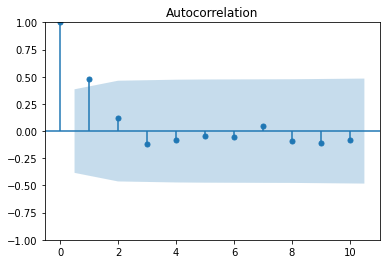

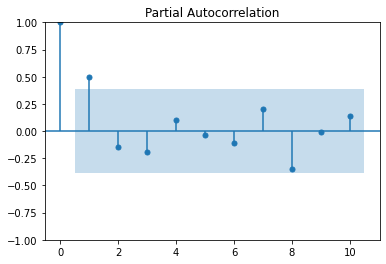

In [143]:
sm.graphics.tsa.plot_acf(df.Visits.squeeze(),lags=10) # To find q
sm.graphics.tsa.plot_pacf(df.Visits.squeeze(),lags=10) # To find p
plt.show()

In [205]:
model = ARIMA(df.Visits, order=(2,2,4))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                 Visits   No. Observations:                   26
Model:                 ARIMA(2, 2, 4)   Log Likelihood                   0.000
Date:                Sun, 13 Nov 2022   AIC                             14.000
Time:                        23:26:37   BIC                             22.246
Sample:                             0   HQIC                            16.188
                                 - 26                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -7.496e-08         -0        inf      0.000    -7.5e-08    -7.5e-08
ar.L2          1.0000   4.62e-08   2.16e+07      0.000       1.000       1.000
ma.L1      -9.067e-07   7.15e-07     -1.268      0.2

/Users/ZainHaider/Library/Python/3.10/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ZainHaider/Library/Python/3.10/lib/python/site-packages/statsmodels/tsa/statespace/mlemodel.py:2979: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/Users/ZainHaider/Library/Python/3.10/lib/python/site-packages/statsmodels/tsa/stattools.py:1346: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
/Users/ZainHaider/Library/Python/3.10/lib/python/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


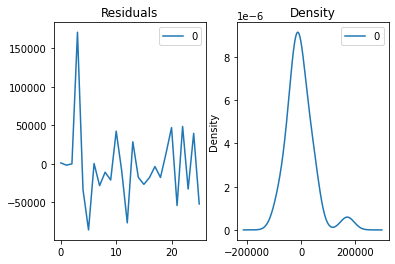

In [150]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


In [151]:
# Create Training and Test
train = df.Visits[:23]
test = df.Visits[23:]


/Users/ZainHaider/Library/Python/3.10/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/ZainHaider/Library/Python/3.10/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


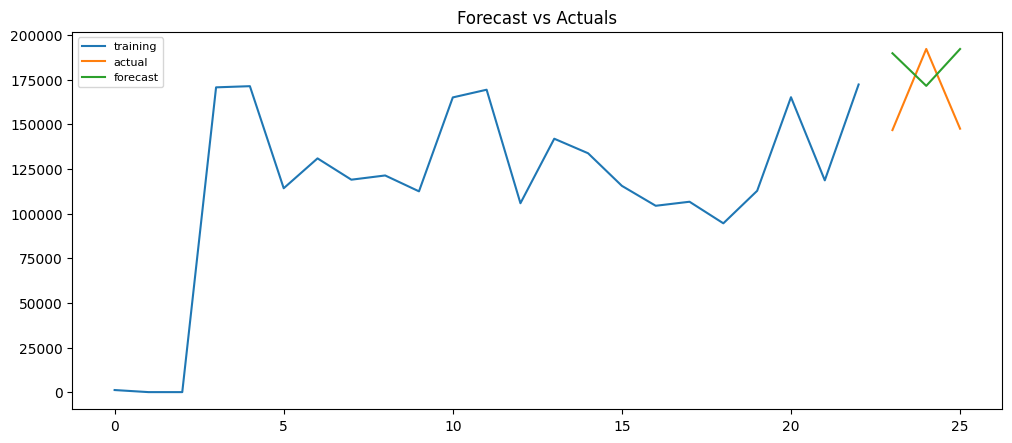

In [202]:
# Build Model
model = ARIMA(train, order=(2,2,4))  
fitted = model.fit()  

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fitted.forecast(3), label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()